[View in Colaboratory](https://colab.research.google.com/github/gauravsharma74/learn_machine_learning/blob/master/Classification_Adult_Income.ipynb)

### Import modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, Normalizer, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score, make_scorer, classification_report, confusion_matrix

### Set warnings off and also set the random state

In [0]:
rs = np.random.RandomState(130917)
#warnings.filterwarnings("ignore")

### Import data and check shape of dataset

In [51]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df.shape

(32561, 15)

### Explore header rows of dataset

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Set header if not set

In [53]:
df.columns = ['age', 'workclass','fnlwgt','education','education-num','marital-status', \
                    'occupation', 'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','targ']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,targ
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Explore numerical features

In [54]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


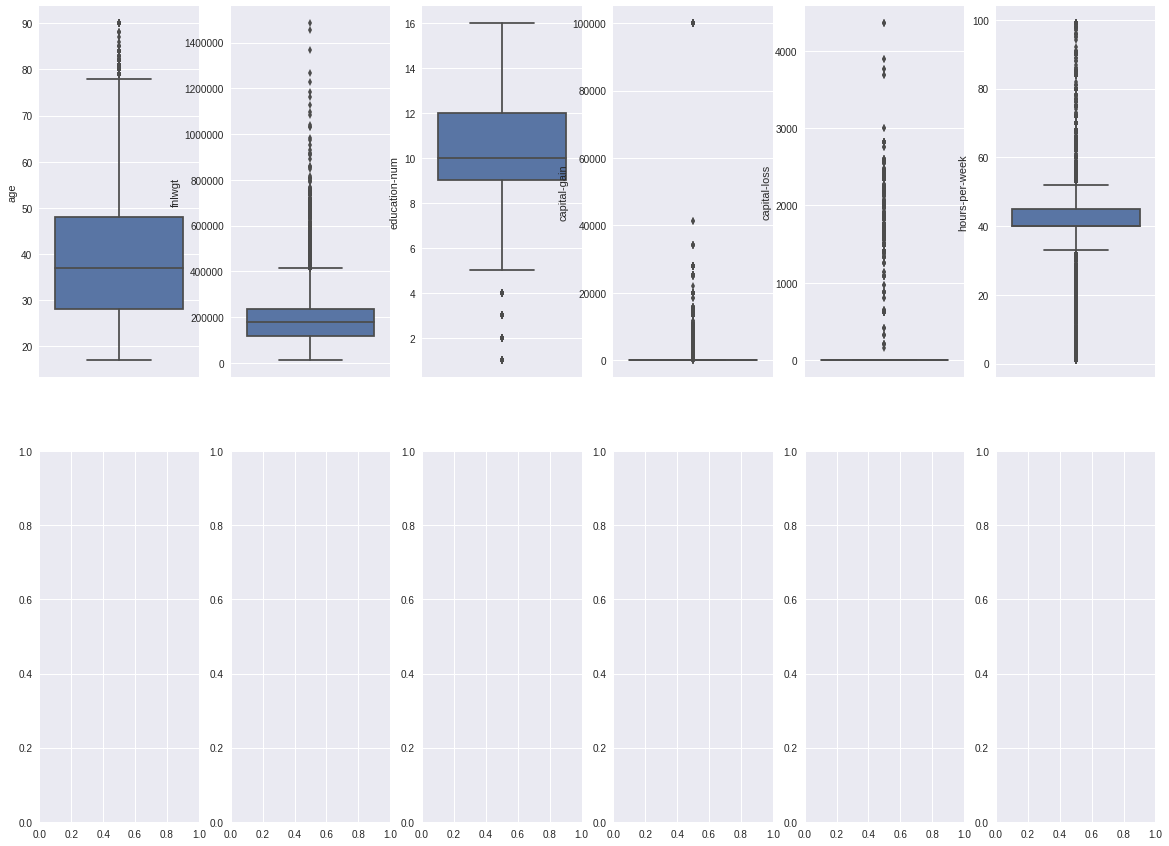

In [55]:
fig, axarr = plt.subplots(nrows=2, ncols=6, figsize=(20, 15))
sns.boxplot(df['age'], ax=axarr[0,0], orient='v')
sns.boxplot(df['fnlwgt'], ax=axarr[0,1], orient='v')
sns.boxplot(df['education-num'], ax=axarr[0,2], orient='v')
sns.boxplot(df['capital-gain'], ax=axarr[0,3], orient='v')
sns.boxplot(df['capital-loss'], ax=axarr[0,4], orient='v')
sns.boxplot(df['hours-per-week'], ax=axarr[0,5], orient='v')

plt.show()

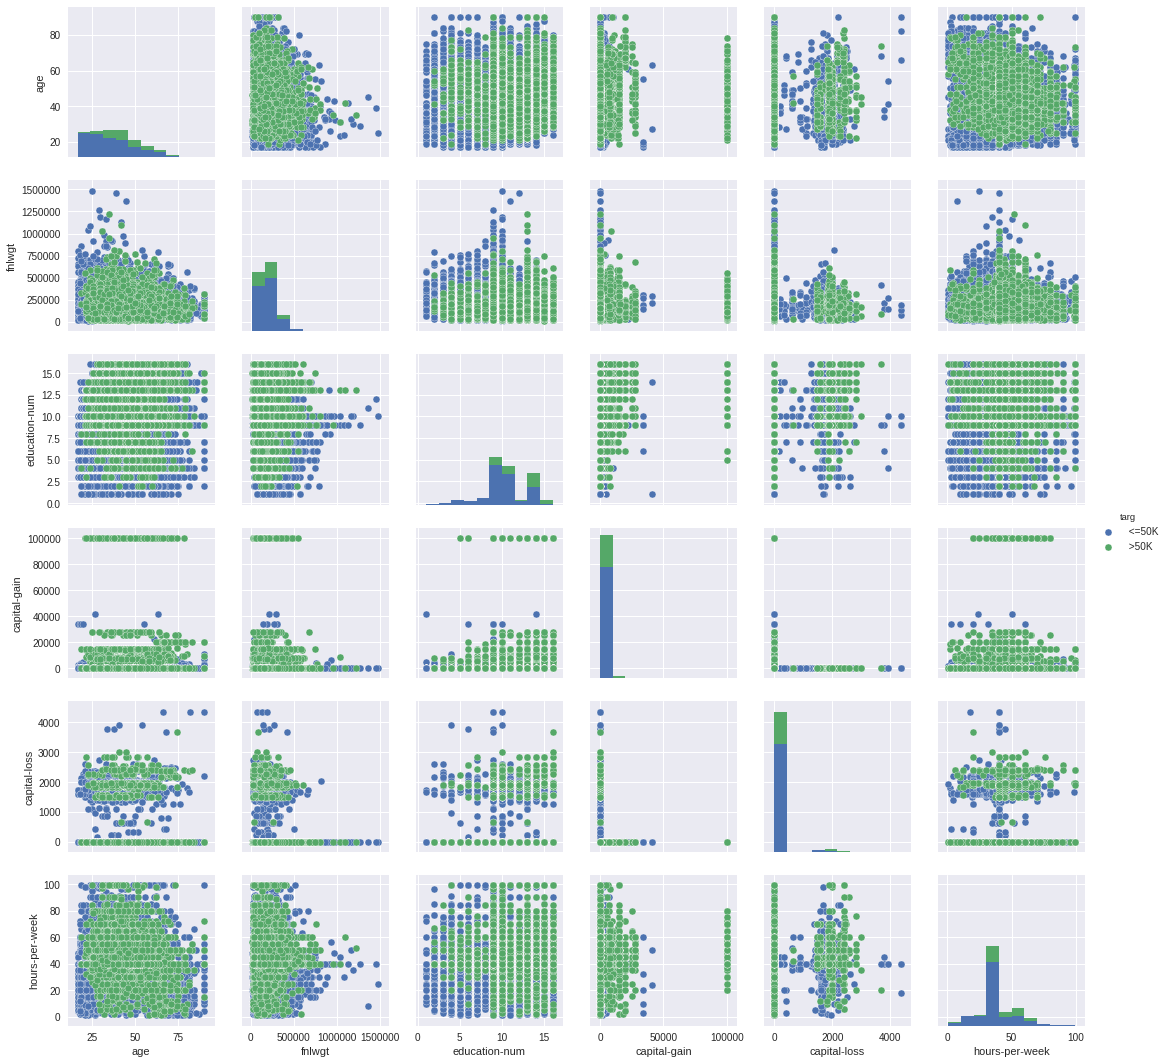

In [56]:
sns.pairplot(data=df, hue='targ')
plt.show()

### Explore target variable

In [57]:
print(df['targ'].nunique())
df['targ'].value_counts()

2


 <=50K    24720
 >50K      7841
Name: targ, dtype: int64

In [58]:
# lets encode the target variable
df['targ'] = LabelEncoder().fit(df['targ']).transform(df['targ'])
df['targ'].value_counts()

0    24720
1     7841
Name: targ, dtype: int64

### Handle missing values

In [59]:
# count of null rows
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
targ              0
dtype: int64

In [60]:
# count of non null rows
df.isnull().count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
targ              32561
dtype: int64

### Handle highly correlated features

In [61]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,targ
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
targ,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


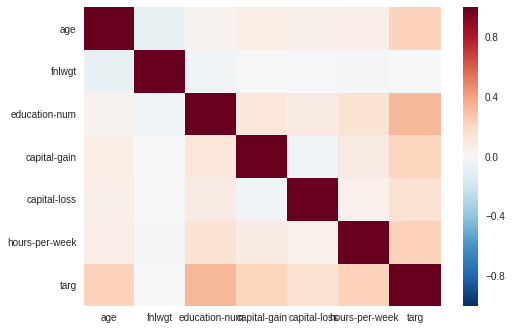

In [62]:
sns.heatmap(df.corr())
plt.show()

### Create new features if required

In [0]:
# no such features required for this dataset

### Create dataframes of continuous and categorical features

In [0]:
cat_columns = ['workclass','education','marital-status', \
                    'occupation', 'relationship','race','sex','native-country']
cont_columns = ['age',	'fnlwgt',	'education-num',	'capital-gain',	'capital-loss',	'hours-per-week']
# cont_columns = none available for this dataset
df_cont = df[cont_columns]
df_cat = df[cat_columns]
df_y = df['targ']

### Move target column to end of dataframe

In [0]:
#cols = list(df_dummies.columns.values) #Make a list of all of the columns in the df
#cols.pop(cols.index('targ')) #Remove b from list
#df_dummies_1 = df_dummies[cols+['targ']]

### Rescale dataframe of continuous features

In [66]:
df_cont_rescaled = pd.DataFrame(StandardScaler().fit(df_cont).transform(df_cont))
df_cont_rescaled.columns = ['age',	'fnlwgt',	'education-num',	'capital-gain',	'capital-loss',	'hours-per-week']
df_cont_rescaled.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


### Create dummy variables for categorical columns

In [0]:
# none available in this dataset
df_cat_dummied = pd.get_dummies(df_cat, drop_first=True)

### Concat all dataframes - continuous + categorical + target

In [68]:
df_final = pd.concat([df_cont_rescaled, df_cat_dummied, df_y], axis=1)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,targ
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Prepare X and y to train model

In [69]:
X = np.array(df_final.iloc[:,:-1])
y = np.array(df_final.iloc[:,-1]).reshape(-1,1)
print(X.shape, y.shape)

(32561, 100) (32561, 1)


### Prepare train and test data from dataset

In [0]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, stratify=y, test_size=0.3)

### Prepare list of modules to be used

In [0]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))

### Train the model

In [72]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=rs)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.851747 (0.007292)
LDA: 0.840646 (0.006564)
KNN: 0.829809 (0.004441)
CART: 0.815550 (0.009487)
NB: 0.492891 (0.014265)


### Fit and Predict

In [73]:
model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8525949431876344
[[7017  400]
 [1040 1312]]
             precision    recall  f1-score   support

          0       0.87      0.95      0.91      7417
          1       0.77      0.56      0.65      2352

avg / total       0.85      0.85      0.84      9769

